## 4ª Lista de exercícios de Desenvolvimento Econômico

In [2]:
# bibliotecas usadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo uma paleta de cores personalizada
colors = {
    'bg': '#FDF6E3',    
    'text': '#5C5C5C',    
    'primary': '#D8A7B1',  
    'secondary': '#B6A6CA',
    'accent': '#A6D8D4',   
    'line_city': '#8E44AD',
    'line_bairro': '#E91E63' 
}

plt.rcParams.update({
    'figure.facecolor': colors['bg'],
    'axes.facecolor': colors['bg'],
    'axes.edgecolor': colors['secondary'],
    'axes.labelcolor': colors['text'],
    'xtick.color': colors['text'],
    'ytick.color': colors['text'],
    'text.color': colors['text'],
    'font.family': 'serif', # Fonte serifada para toque vintage
    'grid.color': '#E0E0E0',
    'grid.linestyle': '--'
})

In [3]:
df = pd.read_excel(r'C:\{estudos}\ESP\Economia-do-Setor-Publico-2025.2\Desenvolvimento Econômico\Recife  Dados rdpc por AP.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73808 entries, 0 to 73807
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Área de Ponderação           73808 non-null  int64  
 1   V1006                        73808 non-null  int64  
 2   Renda domiciliar per capita  73808 non-null  float64
 3   mulher                       73808 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.3 MB


c:\Users\Madu\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [6]:
CODIGO_SEU_BAIRRO = 2611606005012

# 3. LINHA DE POBREZA (R$)
LINHA_POBREZA = 127.5

#### Funções de cálculo
- gini;
- curva de lorenz;
- medidas de pobreza Foster-Greer-Thorbecke: fgt(0) e fgt(1).

In [ ]:
def calcular_gini(array_renda):
    """Calcula o Coeficiente de Gini."""
    array_renda = np.sort(array_renda)
    n = len(array_renda)
    if n == 0: return 0
    index = np.arange(1, n + 1)
    return ((2 * index - n - 1) * array_renda).sum() / (n * array_renda.sum())

def curva_lorenz(array_renda):
    """Gera coordenadas X e Y da Curva de Lorenz."""
    array_renda = np.sort(array_renda)
    n = len(array_renda)
    renda_acum = np.cumsum(array_renda)
    total_renda = renda_acum[-1] if n > 0 else 1
    y = np.insert(renda_acum / total_renda, 0, 0)
    x = np.insert(np.arange(1, n + 1) / n, 0, 0)
    return x, y

def calcular_fgt(array_renda, linha_pobreza):
    """Calcula FGT(0) e FGT(1)."""
    n = len(array_renda)
    if n == 0: return 0, 0
    
    pobres = array_renda[array_renda < linha_pobreza]
    q = len(pobres)
    
    fgt0 = q / n # Incidência
    
    gap = (linha_pobreza - pobres) / linha_pobreza
    fgt1 = gap.sum() / n # Profundidade - Hiato (Gap)
    
    return fgt0, fgt1


TABELA DE RESULTADOS:
                  Indicador Recife (Total) Dois Irmãos
0            Índice de Gini         0.6223      0.6143
1  FGT(0) - Pobreza < 127.5         14.18%      10.38%
2            FGT(1) - Hiato         0.0812      0.0542


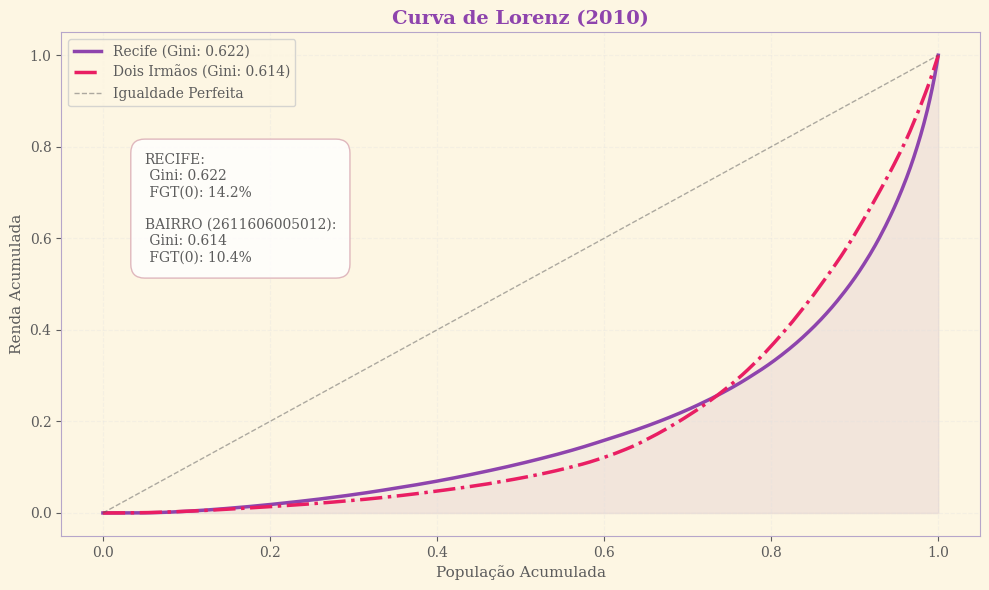

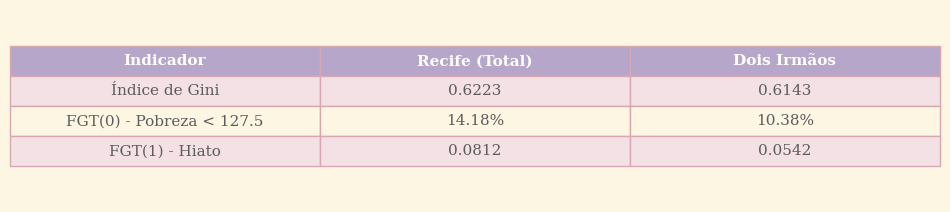

In [14]:
if df is not None:
    # --- A) e C) Cálculos para RECIFE (Base completa) ---
    renda_recife = df['Renda domiciliar per capita'].values
    gini_recife = calcular_gini(renda_recife)
    fgt0_recife, fgt1_recife = calcular_fgt(renda_recife, LINHA_POBREZA)

    # --- B) e D) Cálculos para ÁREA DE PONDERAÇÃO (Bairro) ---
    df_bairro = df[df['Área de Ponderação'] == CODIGO_SEU_BAIRRO]
    renda_bairro = df_bairro['Renda domiciliar per capita'].values

    if len(renda_bairro) > 0:
        gini_bairro = calcular_gini(renda_bairro)
        fgt0_bairro, fgt1_bairro = calcular_fgt(renda_bairro, LINHA_POBREZA)
    else:
        gini_bairro, fgt0_bairro, fgt1_bairro = 0, 0, 0
        print(f"AVISO: Nenhuma pessoa encontrada na Área de Ponderação {CODIGO_SEU_BAIRRO}.")
        
    # Preparar dados para tabela
    resultados = pd.DataFrame({
        'Indicador': ['Índice de Gini', f'FGT(0) - Pobreza < {LINHA_POBREZA}', 'FGT(1) - Hiato'],
        'Recife (Total)': [f'{gini_recife:.4f}', f'{fgt0_recife*100:.2f}%', f'{fgt1_recife:.4f}'],
        'Dois Irmãos': [f'{gini_bairro:.4f}', f'{fgt0_bairro*100:.2f}%', f'{fgt1_bairro:.4f}']
    })

    print("\nTABELA DE RESULTADOS:")
    print(resultados)

    # Gráfico Lorenz
    plt.figure(figsize=(10, 6))
    
    # Plot Recife
    x_rec, y_rec = curva_lorenz(renda_recife)
    plt.plot(x_rec, y_rec, color=colors['line_city'], linewidth=2.5, label=f'Recife (Gini: {gini_recife:.3f})')
    plt.fill_between(x_rec, y_rec, 0, color=colors['secondary'], alpha=0.1)

    # Plot Bairro (se houver dados)
    if len(renda_bairro) > 0:
        x_bai, y_bai = curva_lorenz(renda_bairro)
        plt.plot(x_bai, y_bai, color=colors['line_bairro'], linewidth=2.5, linestyle='-.', label=f'Dois Irmãos (Gini: {gini_bairro:.3f})')
        plt.fill_between(x_bai, y_bai, 0, color=colors['primary'], alpha=0.1)

    plt.plot([0, 1], [0, 1], color=colors['text'], linestyle='--', linewidth=1, alpha=0.5, label='Igualdade Perfeita')
    
    plt.title('Curva de Lorenz (2010)', fontsize=14, fontweight='bold', color=colors['line_city'])
    plt.xlabel('População Acumulada', fontsize=11)
    plt.ylabel('Renda Acumulada', fontsize=11)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Texto Informativo no gráfico
    info_text = (
        f"RECIFE:\n Gini: {gini_recife:.3f}\n FGT(0): {fgt0_recife*100:.1f}%\n\n"
        f"BAIRRO ({CODIGO_SEU_BAIRRO}):\n Gini: {gini_bairro:.3f}\n FGT(0): {fgt0_bairro*100:.1f}%"
    )
    plt.text(0.05, 0.55, info_text, fontsize=10, 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor=colors['primary'], boxstyle='round,pad=1'))
    
    plt.tight_layout()
    plt.show()

    # Tabela Visual
    fig, ax = plt.subplots(figsize=(10, 2.5))
    ax.axis('off')
    tbl = ax.table(cellText=resultados.values, colLabels=resultados.columns, loc='center', cellLoc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(11)
    tbl.scale(1.2, 1.8)
    
    # Cores da tabela
    for (row, col), cell in tbl.get_celld().items():
        if row == 0:
            cell.set_facecolor(colors['secondary'])
            cell.set_text_props(color='white', fontweight='bold')
        elif row % 2 == 0:
            cell.set_facecolor(colors['bg'])
        else:
            cell.set_facecolor('#F4E1E6')
        cell.set_edgecolor(colors['primary'])
    
    plt.show()

### a) Através do Índice de Gini, calcule o nível de desigualdade da Cidade